----
# Laboratorium 4 - Transmitancja i charakterystyki częstotliwościowe
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej  

---- 
## 0. Zagadnienia do opanowania przed zajęciami
---- 
### 0.1. Zapoznanie z postawami biblioteki *sympy*
https://docs.sympy.org/latest/tutorial/index.html
### 0.2. Przydatne informacje:
Funkcje z biblioteki *sympy* potrzebne do zrealizowania ćwiczenia:  
`sympy.Symbol, sympy.I, sympy.re(), sympy.im(), sympy.Abs, sympy.arg`

Dokumentacja i opisy poszczególnych funkcji *sympy*:

- https://docs.sympy.org/latest/tutorial/gotchas.html#symbols  
- https://docs.sympy.org/latest/modules/utilities/lambdify.html
- https://docs.sympy.org/latest/modules/functions/elementary.html



---- 
## Transmitancje
---- 

$$ H1(s) = {{s} \over {5s + 1}} $$  
$$ H2(s) = {{2} \over {s + 3}} $$  
$$ H3(s) = {{s + 2} \over {s + 3}} $$  
$$ H4(s) = {{s + 2} \over {s + 1}} $$  
$$ H5(s) = {{2s + 3} \over {2s + 4}} $$
$$ H6(s) = {{1} \over {2s^2 + s + 1}} $$    

In [9]:
%matplotlib inline
import sympy 
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
default_figsize=(12, 6)

----
## 1. Charakterystyka amplitudowa i fazowa układu - metoda analityczna
----
### Zadanie: Wyznacz i wyświetl matematyczną postać charakterystyki amplitudowej i fazowej dla układu o podanej transmitancji operatorowej.
Podpowiedź: użyj `sympy.I`, `sympy.re()`, `sympy.im()`  

In [10]:
#declare symbolic variable 'w' (omega)
w = sympy.Symbol('w', real = True)
#declare symbolic variable 's'
s = 0 + sympy.I*w

# transmitancja układów
H1 = s/(5*s+1)
H2 = 2/(s+3)
H3 = (s+2)/(s+3)
H4 = (s+2)/(s+1)
H5 = (2*s+3)/(2*s+4)
H6 = 1/(2*s**2+s+1)

# wyznaczenie części rzeczywistej i urojonej transmitancji
H1re = sympy.re(H1)
H2re = sympy.re(H2)
H3re = sympy.re(H3)
H4re = sympy.re(H4)
H5re = sympy.re(H5)
H6re = sympy.re(H6)

H1im = sympy.im(H1)
H2im = sympy.im(H2)
H3im = sympy.im(H3)
H4im = sympy.im(H4)
H5im = sympy.im(H5)
H6im = sympy.im(H6)

display(H1re)
display(H1im)

# wyznaczenie modułu i argumentu transmitancji

H1mod = sympy.Abs(H1)
H2mod = sympy.Abs(H2)
H3mod = sympy.Abs(H3)
H4mod = sympy.Abs(H4)
H5mod = sympy.Abs(H5)
H6mod = sympy.Abs(H6)

H1arg = sympy.arg(H1)
H2arg = sympy.arg(H2)
H3arg = sympy.arg(H3)
H4arg = sympy.arg(H4)
H5arg = sympy.arg(H5)
H6arg = sympy.arg(H6)

display(H1mod)
display(H1arg)

5*w**2/(25*w**2 + 1)

w/(25*w**2 + 1)

Abs(w)/sqrt(25*w**2 + 1)

arg(I*w/(5*I*w + 1))

----
## 2. Charakterystyka amplitudowa i fazowa układu - metoda analityczna - wykres
----
### Zadanie: Sporządzić wykresy wyznaczonych wcześniej charakterystyk amplitudowej i fazowej
Okno wykresu podziel na dwie kolumny, w lewej umieść wykres charakterystyki amplitudowej a prawej wykres charakterystyki fazowej. Dodaj opisy i tytuły. Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: użyj `numpy.logspace`, `sympy.lambdify`, `matplotlib.axes.Axes.loglog`, `matplotlib.axes.Axes.semilogx`

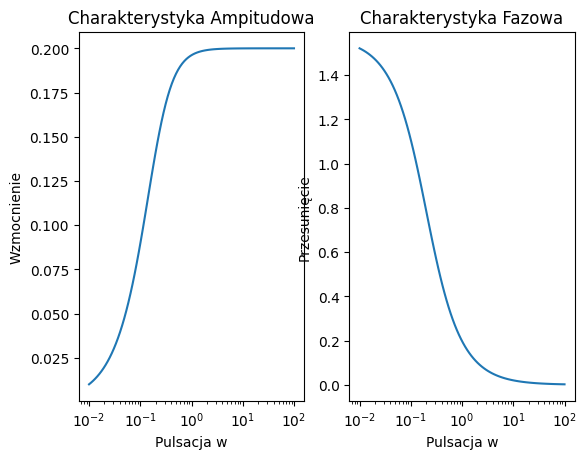

In [11]:
#wykres charakterystyki amplitudowej i charakterystyki fazowej
# obliczyc probki i oddzielic modol i faze
H1mod_impl = sympy.lambdify(w, H1mod)
H1arg_impl = sympy.lambdify(w, H1arg)
w = np.logspace(-2, 2, 100)
H1mod_y = H1mod_impl(w)
H1arg_y = H1arg_impl(w)
plt.subplot(1, 2, 1)
plt.semilogx(w, H1mod_y)
plt.title("Charakterystyka Ampitudowa")
plt.xlabel("Pulsacja w")
plt.ylabel("Wzmocnienie")

plt.subplot(1, 2, 2)
plt.semilogx(w, H1arg_y)
plt.title("Charakterystyka Fazowa")
plt.xlabel("Pulsacja w")
plt.ylabel("Przesunięcie")

plt.show()

----
## 3. Charakterystyka amplitudowa i fazowa układu - metoda numeryczna
----
### Zadanie: Sporządzić wykresy charakterystyk amplitudowej i fazowej korzystając jedynie z biblioteki `numpy`
Okno wykresu podziel na dwie kolumny, w lewej umieść wykres charakterystyki amplitudowej a prawej wykres charakterystyki fazowej. Dodaj opisy i tytuły. Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: $ H(s) = {{B(s)} \over {A(s)}} $
Podpowiedź: wylicz niezależnie wartości dla licznika i mianownika transmitancji  
Podpowiedź: użyj `numpy.logspace`, `numpy.poly1d`, `numpy.abs`, `numpy.angle`, `1j`

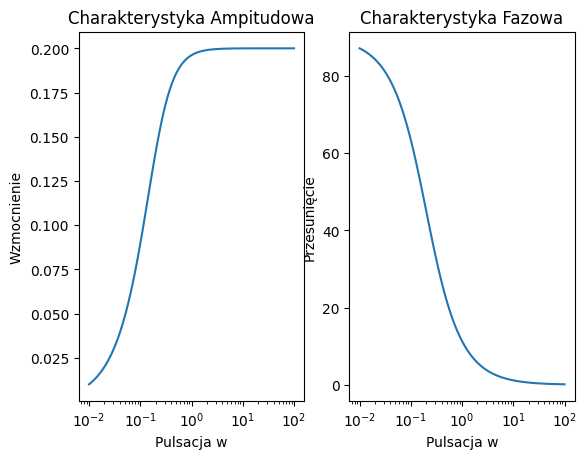

In [15]:
#kolejny wykres charakterystyki amplitudowej i fazowej

# podac licznik i mianownik jako wielomiany A i B
# policzyc wartosci wielomianow i potem je przez siebie podzielic

B = np.poly1d([1, 0])
A = np.poly1d([5, 1])

w = np.logspace(-2, 2, 100)
Bjw = np.polyval(B, 1j*w)
Ajw = np.polyval(A, 1j*w)
Hjw = Bjw/Ajw
Habs = abs(Hjw)
Hangle = np.angle(Hjw, deg=True)

plt.subplot(1, 2, 1)
plt.semilogx(w, Habs)
plt.title("Charakterystyka Ampitudowa")
plt.xlabel("Pulsacja w")
plt.ylabel("Wzmocnienie")

plt.subplot(1, 2, 2)
plt.semilogx(w, Hangle)
plt.title("Charakterystyka Fazowa")
plt.xlabel("Pulsacja w")
plt.ylabel("Przesunięcie")

plt.show()


----
## 4. Charakterystyka amplitudowa i fazowa układu - metoda numeryczna z użyciem funkcji `freqs` z biblioteki `scipy`
----
Okno wykresu podziel na dwie kolumny, w lewej umieść wykres charakterystyki amplitudowej a prawej wykres charakterystyki fazowej. Dodaj opisy i tytuły. Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: użyj funkcji `scipy.signal.freqs` do wyliczenia wartości transmitancji. 

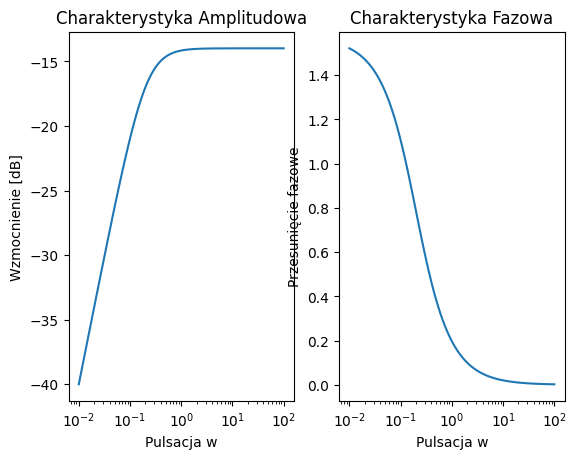

In [13]:
#jeszcze jeden wykres charakterystyki amplitudowej i fazowej
# jako argumenty przyjmuje wielomiany i argumenty w

B = np.poly1d([1, 0])
A = np.poly1d([5, 1])
w = np.logspace(-2, 2, 100)
w, Hjw = scipy.signal.freqs(B, A, w)

Habs = np.abs(Hjw)
Hangle = np.angle(Hjw)

plt.subplot(1, 2, 1)
plt.semilogx(w, 20*np.log10(Habs))
plt.title("Charakterystyka Amplitudowa")
plt.xlabel("Pulsacja w")
plt.ylabel("Wzmocnienie [dB]")

plt.subplot(1, 2, 2)
plt.semilogx(w, Hangle)
plt.title("Charakterystyka Fazowa")
plt.xlabel("Pulsacja w")
plt.ylabel("Przesunięcie fazowe")

plt.show()

---- 
## 5. Charakterystyka amplitudowo-fazowa układu
---- 
### Zadanie: Wyznacz część rzeczywistą oraz część urojoną transmitancji układu. Sporządzić wykres charakterystyki amplitudowo-fazowej dla układu o zadanej transmitancji.
Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: użyj `numpy.real()`, `numpy.imag()`

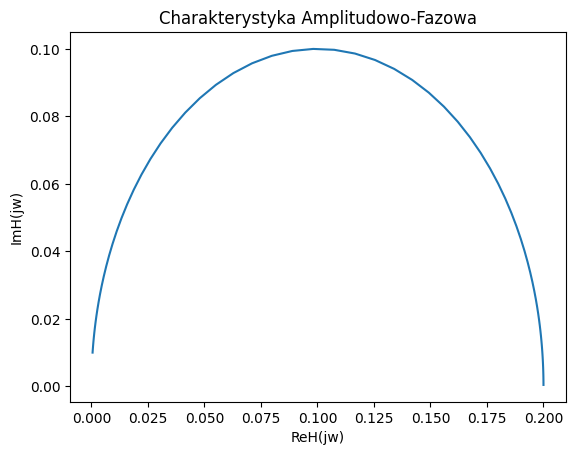

In [20]:
#dla odmiany wykres charakterystyki amplitudowo-fazowej
plt.plot(Hjw.real, Hjw.imag)
plt.title("Charakterystyka Amplitudowo-Fazowa")
plt.xlabel("ReH(jw)")
plt.ylabel("ImH(jw)")
plt.show()